In [23]:
%matplotlib inline
train = pd.read_csv('../share/train.csv')
test = pd.read_csv('../share/test.csv')


In [24]:
df = train[['temp','atemp','casual','registered']]
col = df.columns
df.describe()

,temp,atemp,casual,registered
count,10886.00000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,36.021955,155.552177
std,7.79159,8.474601,49.960477,151.039033
min,0.82000,0.760000,0.000000,0.000000
25%,13.94000,16.665000,4.000000,36.000000
50%,20.50000,24.240000,17.000000,118.000000
75%,26.24000,31.060000,49.000000,222.000000
max,41.00000,45.455000,367.000000,886.000000


# 1. temp 데이터 분석

In [25]:
#Nan값 찾기
df.isna().sum(), df.count()

(temp          0
 atemp         0
 casual        0
 registered    0
 dtype: int64, temp          10886
 atemp         10886
 casual        10886
 registered    10886
 dtype: int64)

In [26]:
# pearson value
# temp, atempt 모두 casual, resistered와 상관계수 비슷
# 다중공선성을 피하기 위해 atempt 삭제 필요
df.corr()

,temp,atemp,casual,registered
temp,1.000000,0.984948,0.467097,0.318571
atemp,0.984948,1.000000,0.462067,0.314635
casual,0.467097,0.462067,1.000000,0.497250
registered,0.318571,0.314635,0.497250,1.000000


In [27]:
#정규성 검정 -> 정규분포 아님
w, p = sp.stats.shapiro(df.temp)
p

/home/henry/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


4.47221826500091e-36

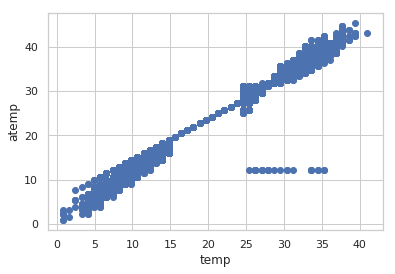

In [28]:
plt.scatter(df.temp, df.atemp)
plt.xlabel('temp')
plt.ylabel('atemp')
plt.show()

In [29]:
# atemp 이상치 24개 -> temp와 atemp 크게 다르지 않으면, 둘중 temp만 사용해도 될 듯
outlier = df[df.temp <= 38][df.temp >= 24][df.atemp > 10][df.atemp < 13]

/home/henry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/henry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/henry/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [30]:
# atemp 일단 NaN으로 치환
df.atemp.loc[outlier.index] = np.NaN
df.loc[outlier.index] 

,temp,atemp,casual,registered
8991,27.88,NaN,21,67
8992,27.06,NaN,16,38
8993,27.06,NaN,4,15
8994,26.24,NaN,0,6
8995,26.24,NaN,0,9
8996,26.24,NaN,2,34
8997,25.42,NaN,6,151
8998,26.24,NaN,11,368
8999,27.88,NaN,43,625
9000,28.70,NaN,58,320


In [31]:
# 정규성 검정

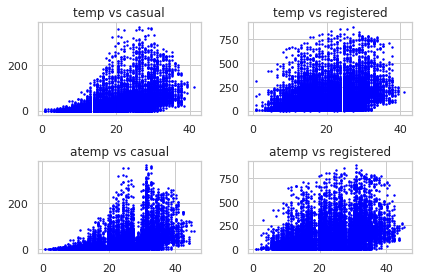

In [32]:
#선형성 확인
f, ax = plt.subplots(2, 2)
ax[0,0].set_title('temp vs casual')
ax[0,0].scatter(df[col[0]], df[col[2]], c='Blue', s=2)

ax[0,1].set_title('temp vs registered')
ax[0,1].scatter(df[col[0]], df[col[3]], c='Blue', s=2)

ax[1,0].set_title('atemp vs casual')
ax[1,0].scatter(df[col[1]], df[col[2]], c='Blue', s=2)

ax[1,1].set_title('atemp vs registered')
ax[1,1].scatter(df[col[1]], df[col[3]], c='Blue', s=2)

plt.tight_layout()
plt.show()

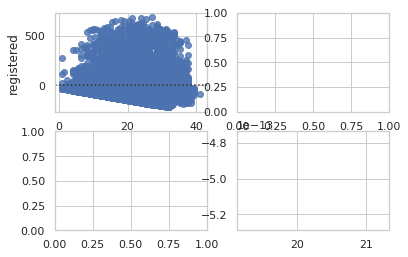

In [33]:
f, ax = plt.subplots(2, 2)

sns.residplot(df[col[0]], df[col[3]], ax=ax[0,0])
plt.show()

# 2. 종속변수와의 관계 분석

# temp별 대여량

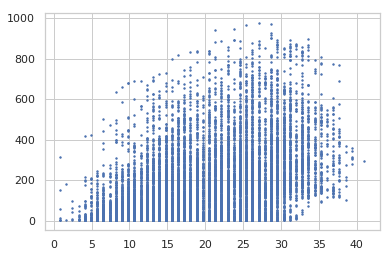

In [34]:
temp_counts = train[['temp','count']]
plt.scatter(temp_counts['temp'], temp_counts['count'], s=2)

### 1) temp 구간 나누기

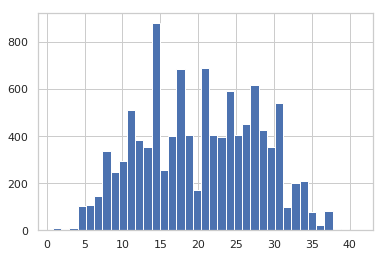

In [35]:
n, bins, pathes = plt.hist(train['temp'], bins='auto')

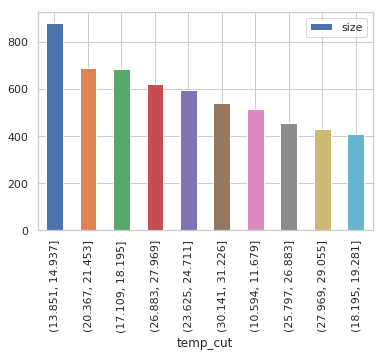

In [36]:
temp_counts['temp_cut']=pd.cut(train['temp'], bins=bins)
temp_counts.groupby(temp_counts['temp_cut']).size().reset_index().rename({0 : 'size'}, axis='columns').sort_values(by='size', ascending=False).head(10).plot.bar(x='temp_cut',y='size')
plt.show()

In [37]:
temp_counts.tail()

,temp,count,temp_cut
10881,15.58,336,"(14.937, 16.023]"
10882,14.76,241,"(13.851, 14.937]"
10883,13.94,168,"(13.851, 14.937]"
10884,13.94,129,"(13.851, 14.937]"
10885,13.12,88,"(12.765, 13.851]"


### 2) temp 구간 따른 count

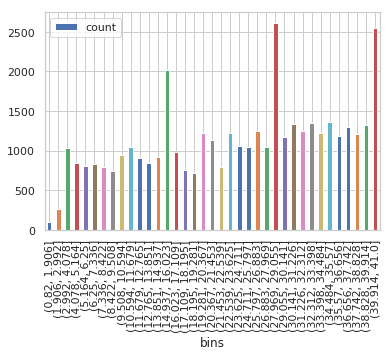

In [38]:
temp_counts['bins'] = pd.cut(temp_counts['count'], bins)
temp_counts1 = temp_counts[['count','bins']].groupby('bins').sum().reset_index()
temp_counts1.plot.bar(x='bins', y='count')
plt.show()

In [39]:
temp_counts1.sort_values('count', ascending=False).head()

,bins,count
25,"(27.969, 29.055]",2614
36,"(39.914, 41.0]",2555
13,"(14.937, 16.023]",2023
31,"(34.484, 35.57]",1365
29,"(32.312, 33.398]",1353


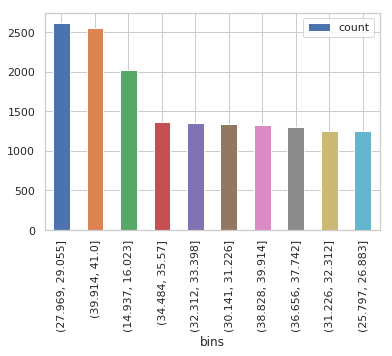

In [40]:
temp_counts1.sort_values(by='count', ascending=False).head(10).plot.bar(x='bins', y='count')
plt.show()

# 2. 전체데이터 분석

시계열 분석: 추세 확인(연도별, 월별, 시간별, 계절별) -> 추세가 있다면 추세를 없애야 함

In [166]:
#seaon One-hot-encoding
#새로운 df생성
df_season = pd.get_dummies(train['season'],prefix=['season'])
df_season.columns = ['spring', 'summer','fall','winter']
train_new = pd.concat([train, df_season], axis='columns')
train_new.drop(columns='season', inplace=True)

In [167]:
from datetime import datetime
train_new['datetime'] = pd.to_datetime(train_new[col[0]], format='%Y-%m-%d %H:%M:%S')

In [168]:
#year, month, time column 추가
train_new['year'] = train_new['datetime'].apply(lambda x : x.year)
train_new['month'] = train_new['datetime'].apply(lambda x : x.month)
train_new['time'] = train_new['datetime'].apply(lambda x : x.hour)
train_new.drop(columns='datetime', inplace=True)

In [169]:
col = train_new.columns
cond1 = train_new[col[-3]]==2011
cond2 = train_new[col[-3]]==2012
cond_spring = train_new['spring']==0
cond_summer = train_new['summer']==0
cond_fall = train_new['fall']==0
cond_winter = train_new['winter']==0

In [171]:
monthly_xticks = []
for i in train_new['year'].unique():
    for j in train_new['month'].unique():
        monthly_xticks.append("{}-{}".format(i,j))
hourly_xticks = list(range(0, 23+1)) + list(range(0, 23+1))

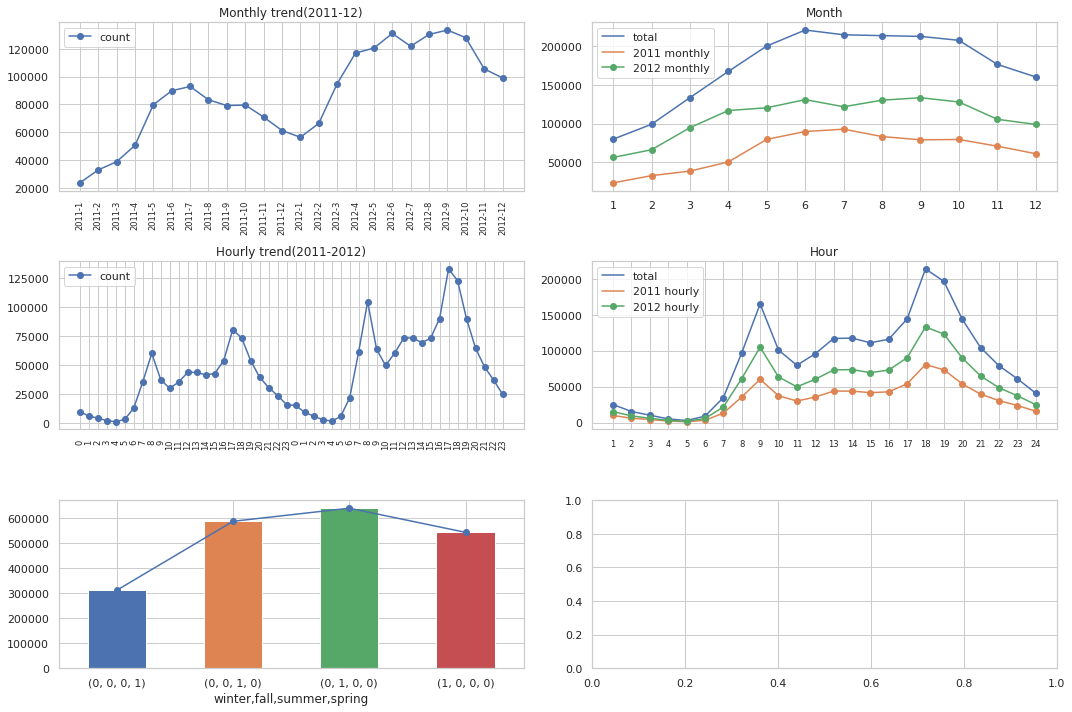

In [172]:
f, axes = plt.subplots(3,2, figsize=(15,10))

# month
# 시계열의 특징대로 시간이 갈수록 값이 커짐
train_new.groupby(['year', 'month'])['count'].sum().reset_index().plot.line(y='count', ax=axes[0,0], marker='o', title='Monthly trend(2011-12)')
axes[0,0].set_xticks(np.arange(0,24))
axes[0,0].set_xticklabels(monthly_xticks, rotation='vertical', visible=True, fontsize='small')

# 11, 12 합해도 추세는 그대로 유지됨
train_new.groupby(['month'])['count'].sum().reset_index().plot.line(y='count', ax=axes[0,1], label='total', marker='o', title='Month')
train_new[cond1].groupby(['month'])['count'].sum().reset_index().plot.line(y='count', ax=axes[0,1], label='2011 monthly', marker='o')
train_new[cond2].groupby(['month'])['count'].sum().reset_index().plot.line(y='count', ax=axes[0,1], label='2012 monthly', marker='o')
axes[0,1].set_xticks(np.arange(0,12))
axes[0,1].set_xticklabels(np.arange(1,12+1))

# Hour
# 시계열 특징대로 시간이 갈수록 값이 커짐
train_new.groupby(['year','time'])['count'].sum().reset_index().plot.line(y='count', ax=axes[1,0], title='Hourly trend(2011-2012)', marker='o')
axes[1,0].set_xticks(np.arange(0,47+1))
axes[1,0].set_xticklabels(hourly_xticks, rotation='vertical',  fontsize='small')

# 11, 12 합해도 추세는 그대로 유지됨
train_new.groupby(['time'])['count'].sum().reset_index().plot.line(y='count', ax=axes[1,1], label='total', title='Hour', marker='o')
train_new[cond1].groupby(['time'])['count'].sum().reset_index().plot.line(y='count', ax=axes[1,1], label='2011 hourly', marker='o')
train_new[cond2].groupby(['time'])['count'].sum().reset_index().plot.line(y='count', ax=axes[1,1], label='2012 hourly', marker='o')
axes[1,1].set_xticks(np.arange(0,24))
axes[1,1].set_xticklabels(np.arange(1,25), fontsize='small')

#season
train_new.groupby([col[-4], col[-5], col[-6], col[-7]])['count'].sum().plot(kind='bar', ax=axes[2,0])
train_new.groupby([col[-4], col[-5], col[-6], col[-7]])['count'].sum().plot(kind='line', ax=axes[2,0], marker='o')

plt.grid(True)
plt.tight_layout()
plt.show()

In [320]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
# temp 구간 나누기
train_temp = train.copy()
train_temp['temp'] = pd.cut(train_temp['temp'], bins=bins)

# df columns reorder
col_ls = train_new.columns.tolist()
col_reorder = col_ls[:7] + col_ls[10:14] + col_ls[15:] + col_ls[7:9+1]
model_df = train_new[col_reorder]
# temp 범주형 추가
model_df['temp'] = train_temp['temp']
model_df.drop('atemp', axis=1, inplace=True)

In [326]:
col_ls = model_df.columns.tolist()
cond_ls = ['weather', 'month', 'time', 'temp']
join_ls = list(map(lambda x : 'C(' + x + ')' if x in cond_ls else x, col_ls[:-3]))
f = "count ~ " + " + ".join(join_ls)
model_col = model_df.columns

In [327]:
dfx0 = model_df[model_col[:-3]]
dfX = sm.add_constant(dfx0)
dfy = model_df[model_col[-1]]
dfa = pd.concat([dfX, dfy], axis=1)
model_bike = smf.ols(formula=str(f), data=dfa)
result_bike = model_bike.fit()

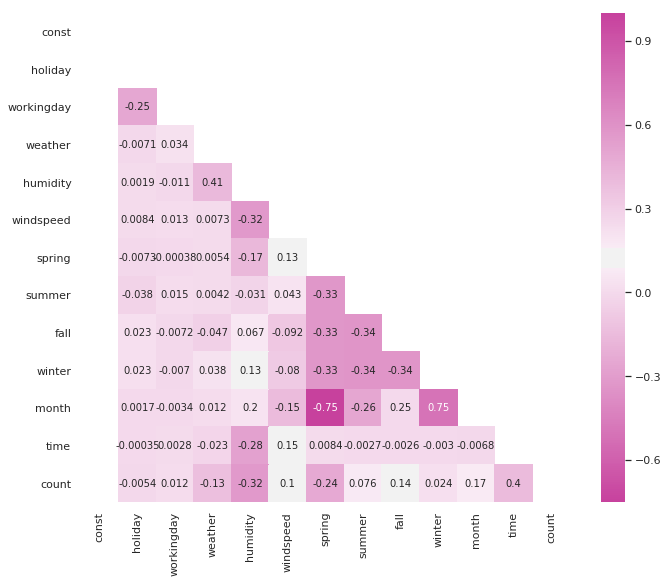

In [388]:
#correlation matrix
#연습용. 의미없음. 범주데이터가 너무 많음
cor_mat = dfa.corr()
mask = np.zeros_like(cor_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(330, 330, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True, cmap=cmap)
plt.show()

In [383]:
# time의 영향력이 압도적
print(result_bike.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     251.7
Date:                Sun, 04 Nov 2018   Prob (F-statistic):               0.00
Time:                        23:51:26   Log-Likelihood:                -66410.
No. Observations:               10879   AIC:                         1.330e+05
Df Residuals:                   10801   BIC:                         1.335e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

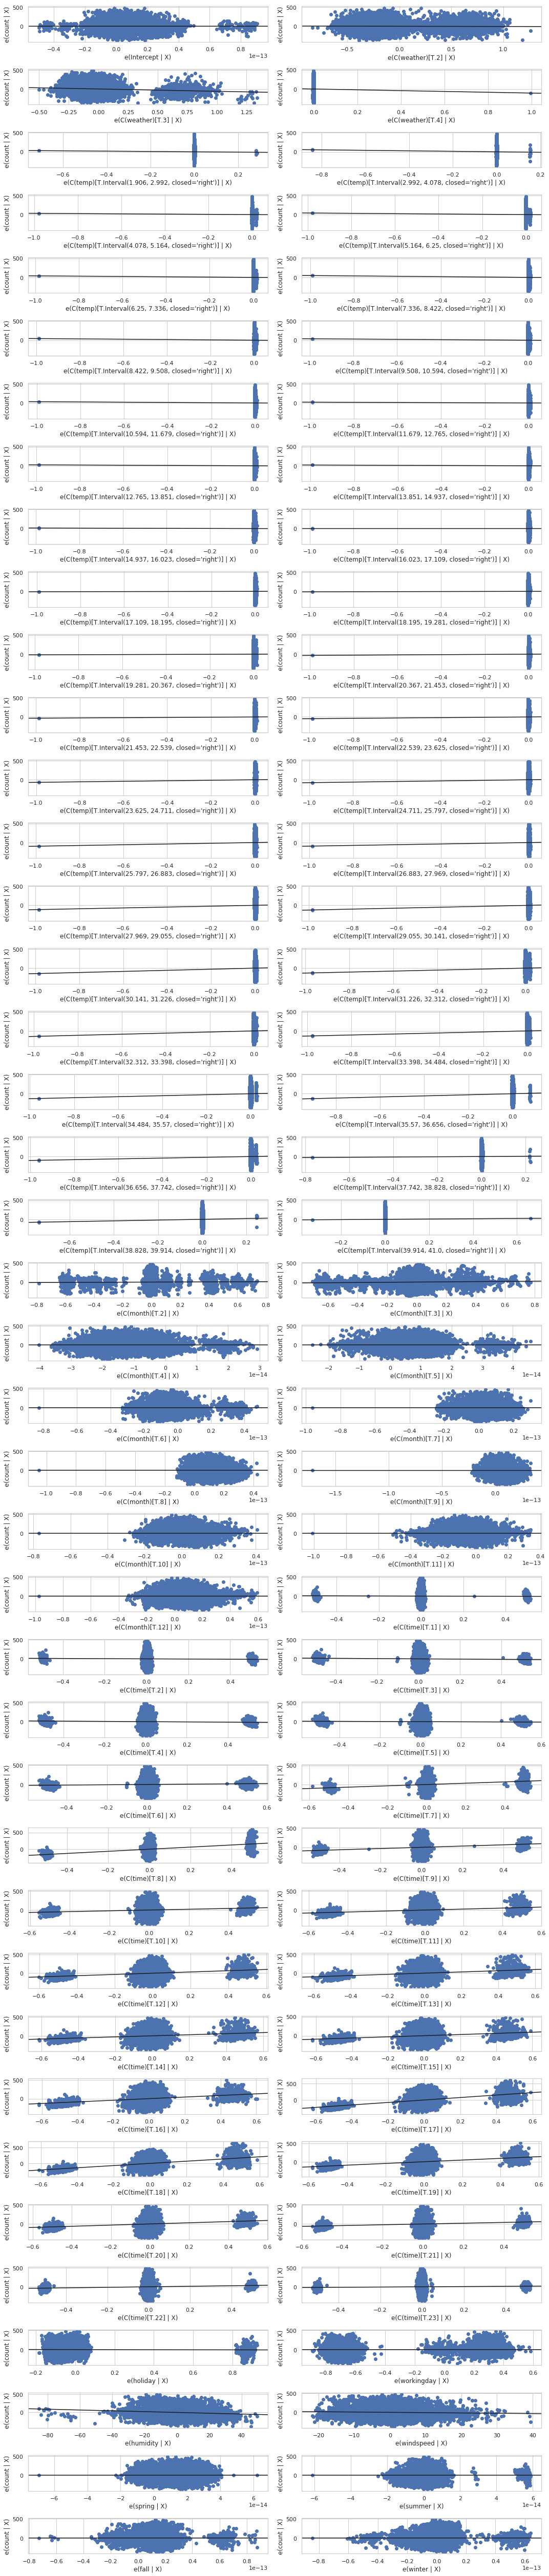

In [385]:
fig = plt.figure(figsize=(15,70))
sm.graphics.plot_partregress_grid(result_bike, fig=fig)
fig.tight_layout()
fig.suptitle('')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(s, model='additive', freq=1)
result.plot()
plt.show()

In [137]:
train_new.groupby(['year'])['count'].sum().reset_index().plot.bar(y='count', title='Year')
plt.show()

KeyError: 'year'